In [4]:
import numpy as np
import pandas as pd
from  glob   import glob
import time


import sys
sys.path.append("..") 
from data_provider import read_prices, read_data

## Чтение данных

In [41]:
index_markets = [ 'ADA',  'BNB', 'EOS','ETH','FTT', 'LINK',  'NEO','SOL','THETA', 'TRX',  'VET', 'RUNE']

In [42]:
pair = 'BTC'
assets = index_markets
assets = [x + '-' + pair for x in assets]
tf = '1h'
start_date = '2021-03-01'

def append_assets(assets, tf):
    '''
    df_list - Возвращеает список с датасетам
    '''
    df_list = []
    for asset in assets:
        df = read_data(asset, tf, start_date)
        df['T'] = (df['T']/1000).astype(int)
        df.index = df['T']
        df = df['C']
        df.name = asset
        df_list.append(df)
    return df_list

df_list = append_assets(assets, tf)
df_res = pd.concat(df_list, axis = 1, join ='outer')



In [43]:
df_res = df_res.dropna()

In [44]:
df_res

,ADA-BTC,BNB-BTC,EOS-BTC,ETH-BTC,FTT-BTC,LINK-BTC,NEO-BTC,SOL-BTC,THETA-BTC,TRX-BTC,VET-BTC,RUNE-BTC
T,,,,,,,,,,,,
1616263200,0.00002094,0.0045628,0.0000752,0.031156,0.0006983,0.00051435,0.000743,0.00024674,0.00013894,0.00000109,0.00000152,0.00010079
1616266800,0.00002109,0.0045699,0.0000754,0.031175,0.0006971,0.00051672,0.000749,0.00024724,0.00014090,0.00000108,0.00000152,0.00010090
1616270400,0.00002104,0.0045576,0.0000753,0.031229,0.0006969,0.00051656,0.000746,0.00024740,0.00014409,0.00000108,0.00000158,0.00010036
1616274000,0.00002104,0.0045548,0.0000753,0.031222,0.0006960,0.00051478,0.000746,0.00024718,0.00014468,0.00000108,0.00000158,0.00010018
1616277600,0.00002094,0.0045474,0.0000762,0.031252,0.0006941,0.00051433,0.000746,0.00024684,0.00014422,0.00000107,0.00000157,0.00010023
...,...,...,...,...,...,...,...,...,...,...,...,...
1619845200,0.00002340,0.0108750,0.0001129,0.049032,0.0009530,0.00066150,0.001685,0.00073991,0.00019640,0.00000228,0.00000346,0.00026865
1619848800,0.00002333,0.0108280,0.0001125,0.049305,0.0009544,0.00066347,0.001677,0.00074261,0.00019569,0.00000227,0.00000345,0.00026675
1619852400,0.00002335,0.0108470,0.0001117,0.049516,0.0009548,0.00066370,0.001668,0.00074249,0.00019699,0.00000226,0.00000345,0.00026504


## Returns

In [33]:
asset_returns = df_res.pct_change(1)[1:]

In [34]:
asset_returns

,ADA-BTC,BNB-BTC,EOS-BTC,ETH-BTC,FTT-BTC,LINK-BTC,NEO-BTC,THETA-BTC,TRX-BTC,VET-BTC,RUNE-BTC
T,,,,,,,,,,,
1616266800,0.007163324,0.001556062,0.002659574,0.000609834,-0.001718459,0.004607757,0.008075370,0.014106809,-0.009174312,0.000000000,0.001091378
1616270400,-0.002370792,-0.002691525,-0.001326260,0.001732157,-0.000286903,-0.000309645,-0.004005340,0.022640170,0.000000000,0.039473684,-0.005351833
1616274000,0.000000000,-0.000614358,0.000000000,-0.000224151,-0.001291433,-0.003445873,0.000000000,0.004094663,0.000000000,0.000000000,-0.001793543
1616277600,-0.004752852,-0.001624660,0.011952191,0.000960861,-0.002729885,-0.000874160,0.000000000,-0.003179430,-0.009259259,-0.006329114,0.000499102
1616281200,-0.013371538,0.000329859,-0.022309711,-0.005567644,-0.001728858,-0.008185406,-0.008042895,-0.010192761,-0.018691589,-0.019108280,-0.006684625
...,...,...,...,...,...,...,...,...,...,...,...
1619845200,0.000000000,-0.000459559,-0.000884956,0.001143417,0.000524934,-0.003089443,-0.003548196,0.002449980,0.008849558,-0.002881844,0.005276156
1619848800,-0.002991453,-0.004321839,-0.003542958,0.005567792,0.001469045,0.002978080,-0.004747774,-0.003615071,-0.004385965,-0.002890173,-0.007072399
1619852400,0.000857265,0.001754710,-0.007111111,0.004279485,0.000419111,0.000346662,-0.005366726,0.006643160,-0.004405286,0.000000000,-0.006410497


<AxesSubplot:xlabel='T'>

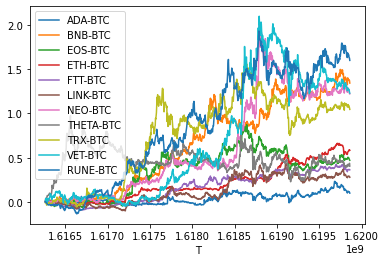

In [35]:
((asset_returns + 1).cumprod()-1).plot()

In [36]:
def sharpe(portfolio_weights):
    port_returns = portfolio_returns(portfolio_weights)
    return port_returns.mean()/port_returns.std()

def portfolio_returns(portfolio_weigths):
    return asset_returns.dot(portfolio_weigths)

## Pypfopt

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


def weights_to_df(cleaned_weights):
    dfw = pd.DataFrame.from_dict([cleaned_weights]).transpose()
    dfw.columns = ['W']
    dfw = dfw[dfw['W'] > 0]
    return dfw

def final_sums(df, total):
    xx = round(df * total, -1)
    return xx[xx['W'] > 50]

In [40]:
#df_train = df_res.iloc[-days:]
df_train = df_res
avg_returns = expected_returns.mean_historical_return(df_train)
cov_mat = risk_models.sample_cov(df_train)


In [20]:
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
dfw = weights_to_df(cleaned_weights)
final_sums(dfw, 3000)

Expected annual return: 23.9%
Annual volatility: 10.3%
Sharpe Ratio: 2.12


,W
BNB-BTC,590.0
ETH-BTC,1520.0
NEO-BTC,190.0
TRX-BTC,70.0
VET-BTC,250.0
RUNE-BTC,380.0


In [15]:
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
dfw = weights_to_df(cleaned_weights)
final_sums(dfw, 4000)

Expected annual return: 12.0%
Annual volatility: 7.4%
Sharpe Ratio: 1.35


,W
ADA-BTC,540.0
ETH-BTC,2460.0
FTT-BTC,990.0


In [23]:
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.max_quadratic_utility(0.1)
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
dfw = weights_to_df(cleaned_weights)
final_sums(dfw, 3000)



Expected annual return: 37.4%
Annual volatility: 25.8%
Sharpe Ratio: 1.37


,W
VET-BTC,2410.0
RUNE-BTC,590.0


In [25]:
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.efficient_risk(1.25)
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
dfw = weights_to_df(cleaned_weights)
final_sums(dfw, 3000)


Expected annual return: 37.5%
Annual volatility: 30.1%
Sharpe Ratio: 1.18


,W
VET-BTC,3000.0
